In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('../data/children_products/clildren_product_showcase_remove_corr.csv')
df.head()

,phone,ОбщаяСуммаЗаказов,ОбщаяМаржаЗаказов,КоличествоТоварныхПозиций,КоличествоЗаказов,ДоляОтменненыхЗаказов,ДоляДоставленныхЗаказов,ОбщееКоличествоТоваров,КоличествоУникальныхТоваров,ОбщаяСуммаУслуг,...,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,МетодДоставки_Групп_Курьерская,МетодДоставки_Групп_Магазины,МетодДоставки_Групп_Пункт выдачи,Гео_МО,Гео_Москва,Гео_Регионы
0,55575453-56535648535679,4875.0,1603.48,6.0,2,0.0,1.0,16.0,12.0,0.0,...,0.000000,0.000000,0.250000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
1,55574950-57515657535772,3325.0,2176.00,1.0,1,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
2,55574851-55545249535475,9650.0,1277.46,26.0,2,0.0,1.0,75.0,41.0,4800.0,...,0.076923,0.019231,0.038462,0.865385,1.0,0.0,0.0,0.0,1.0,0.0
3,55574854-56495552515179,528.0,204.07,4.0,1,0.0,1.0,4.0,4.0,0.0,...,0.000000,0.000000,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
4,55574851-53495753545674,2962.0,653.92,6.0,2,0.5,0.5,6.0,6.0,0.0,...,0.000000,0.000000,0.166667,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87194 entries, 0 to 87193
Columns: 127 entries, phone to Гео_Регионы
dtypes: float64(125), int64(1), object(1)
memory usage: 84.5+ MB


In [25]:
print("Количество пропущенных значений в каждом столбце:")
df.isnull().sum()

Количество пропущенных значений в каждом столбце:


phone                               0
ОбщаяСуммаЗаказов                   0
ОбщаяМаржаЗаказов                   0
КоличествоТоварныхПозиций           0
КоличествоЗаказов                   0
                                   ..
МетодДоставки_Групп_Магазины        0
МетодДоставки_Групп_Пункт выдачи    0
Гео_МО                              0
Гео_Москва                          0
Гео_Регионы                         0
Length: 127, dtype: int64

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)

In [27]:
X = df.drop(['phone'], axis=1, errors='ignore')
X = X.dropna()

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
k_range = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))

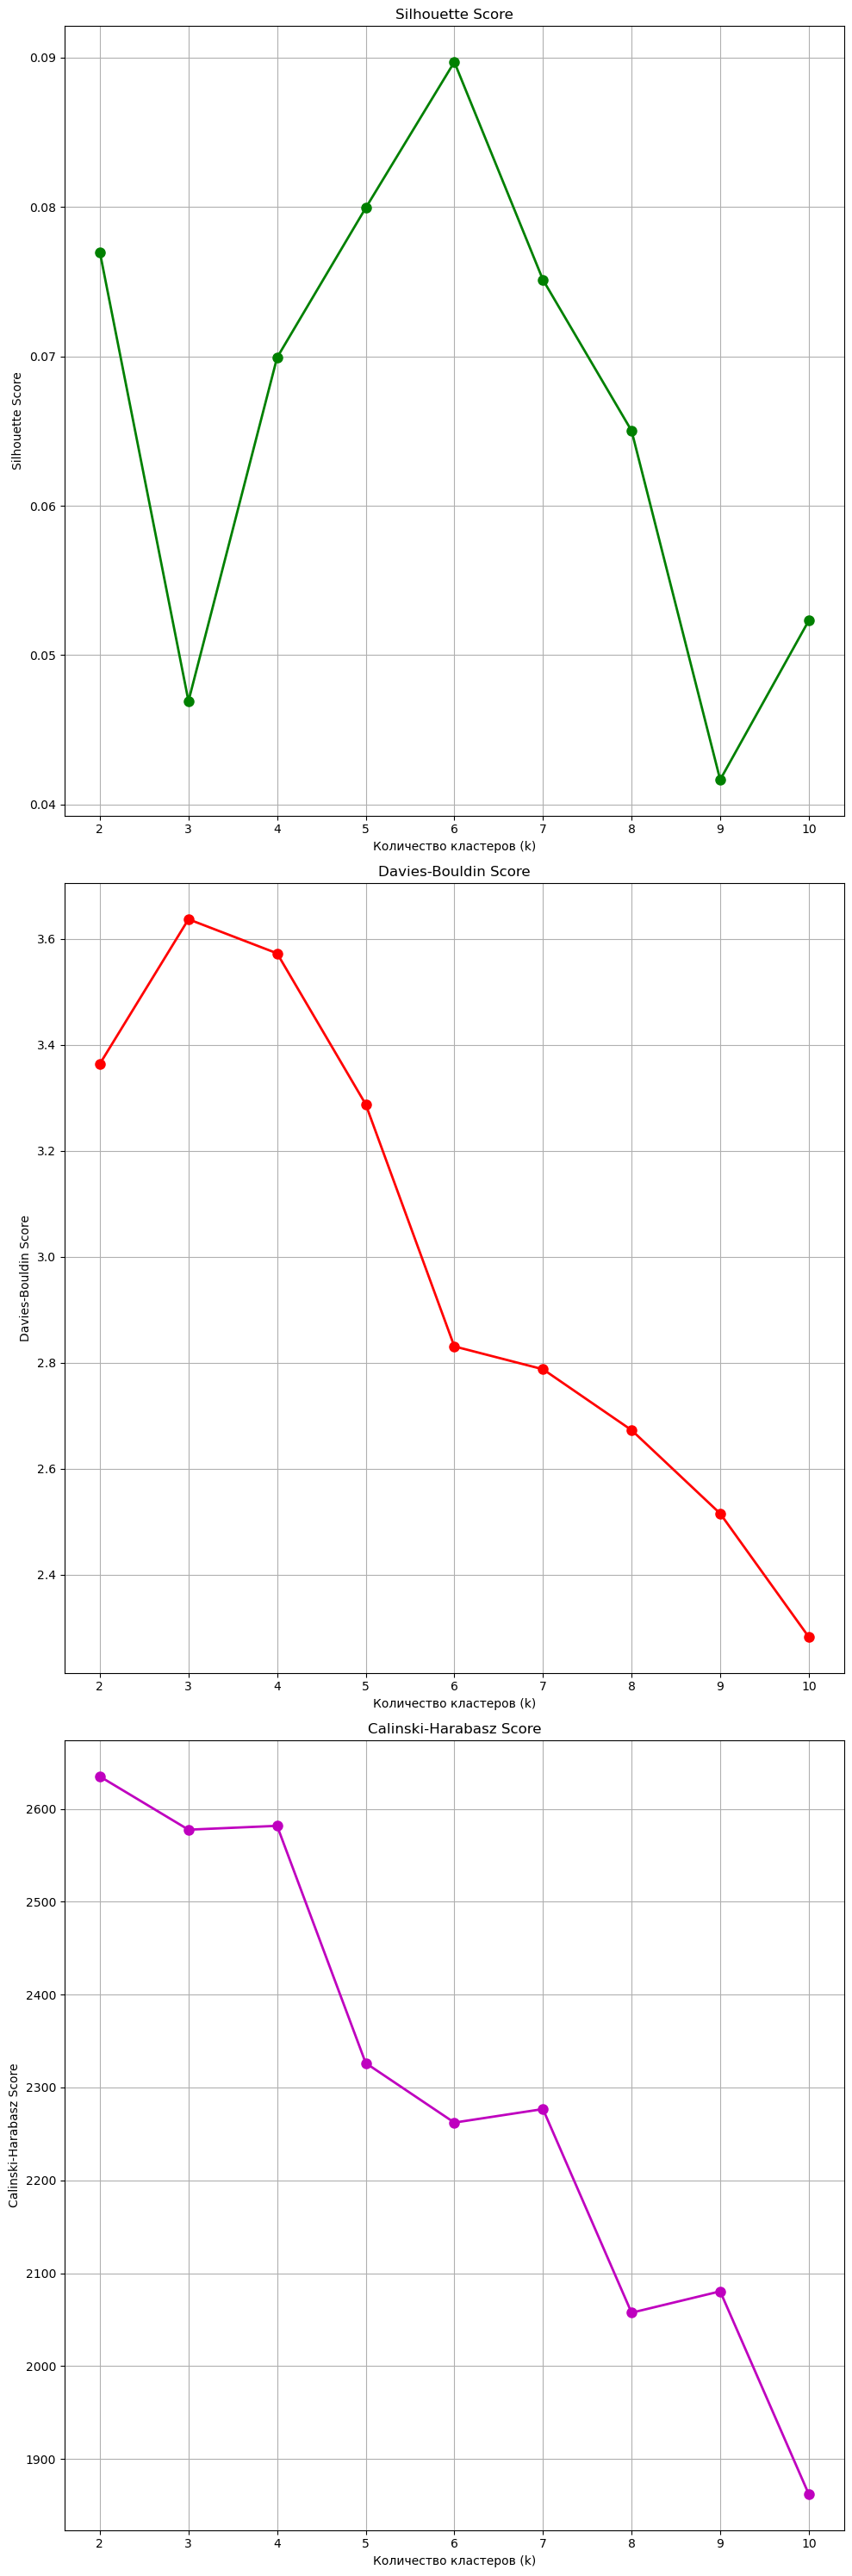

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('Davies-Bouldin Score')
axes[1].set_title('Davies-Bouldin Score')
axes[1].grid(True)

axes[2].plot(k_range, calinski_harabasz_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [32]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = kmeans_labels

print(f"K-Means с k={optimal_k}")
print(f"Распределение по кластерам:")
print(df['kmeans_cluster'].value_counts().sort_index())
print(f"Метрики качества:")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.2f}")

K-Means с k=6
Распределение по кластерам:
kmeans_cluster
0     1721
1    23849
2    15679
3     8799
4    23165
5    13981
Name: count, dtype: int64
Метрики качества:
Silhouette Score: 0.09
Davies-Bouldin Score: 2.83
Calinski-Harabasz Score: 2262.16


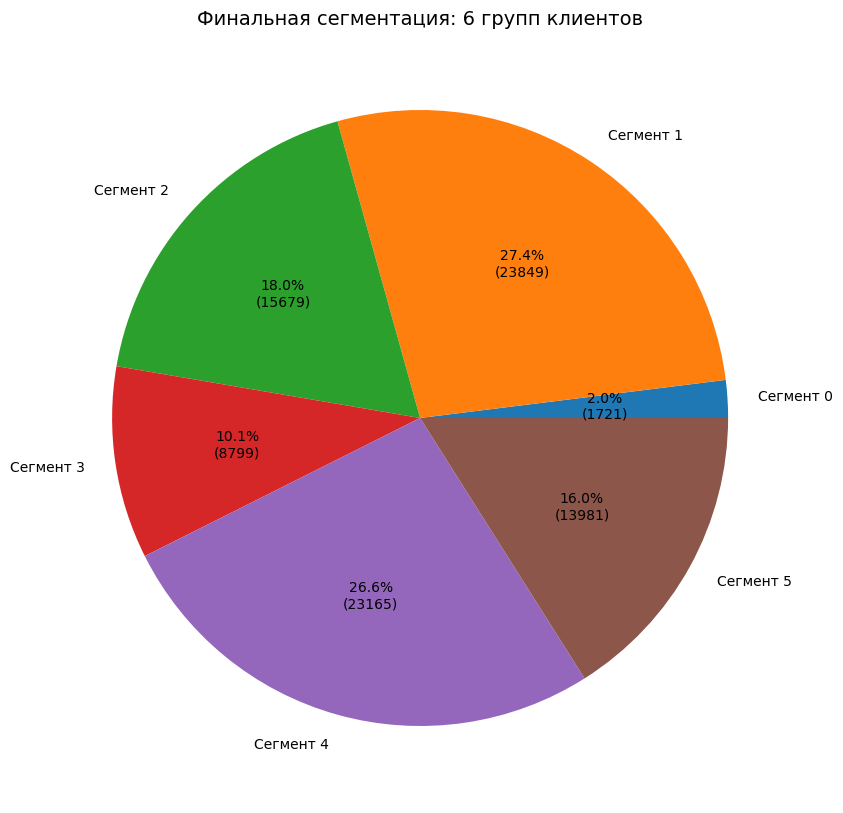

+---+-----------+-------+-------+
| 0 | Сегмент 0 |  1721 |  1.97 |
| 1 | Сегмент 1 | 23849 | 27.35 |
| 2 | Сегмент 2 | 15679 | 17.98 |
| 3 | Сегмент 3 |  8799 | 10.09 |
| 4 | Сегмент 4 | 23165 | 26.57 |
| 5 | Сегмент 5 | 13981 | 16.03 |
+---+-----------+-------+-------+


In [33]:
from tabulate import tabulate

cluster_counts = df['kmeans_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [34]:
cluster_profile = df.drop(['phone'], axis=1, errors='ignore').groupby('kmeans_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

kmeans_cluster,0,1,2,3,4,5
ОбщаяСуммаЗаказов,2431.73,2495.90,3409.90,8049.47,3590.18,7937.37
ОбщаяМаржаЗаказов,511.07,614.44,1083.53,2574.64,577.94,2490.83
КоличествоТоварныхПозиций,2.83,2.64,2.88,10.24,2.56,1.21
КоличествоЗаказов,1.45,1.38,1.67,2.62,1.73,1.28
ДоляОтменненыхЗаказов,0.05,0.04,0.06,0.07,0.05,0.05
ДоляДоставленныхЗаказов,0.93,0.94,0.90,0.91,0.92,0.93
ОбщееКоличествоТоваров,4.10,3.64,4.50,45.16,5.24,1.38
КоличествоУникальныхТоваров,3.29,3.19,3.87,17.37,3.41,1.32
ОбщаяСуммаУслуг,276.63,229.57,257.65,1602.95,167.53,74.38
СредняяСуммаУслуг,75.25,76.00,68.42,73.09,44.45,56.48


In [35]:
X = df.drop(['phone', 'kmeans_cluster'], axis=1, errors='ignore')
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X.shape

(87194, 126)

In [37]:
bic_scores = []
aic_scores = []
em_silhouette_scores = []

for k in k_range:
    print(f"Calculating: {k}")
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    em_silhouette_scores.append(silhouette_score(X_scaled, labels))


Calculating: 2
Calculating: 3
Calculating: 4
Calculating: 5
Calculating: 6
Calculating: 7
Calculating: 8
Calculating: 9
Calculating: 10


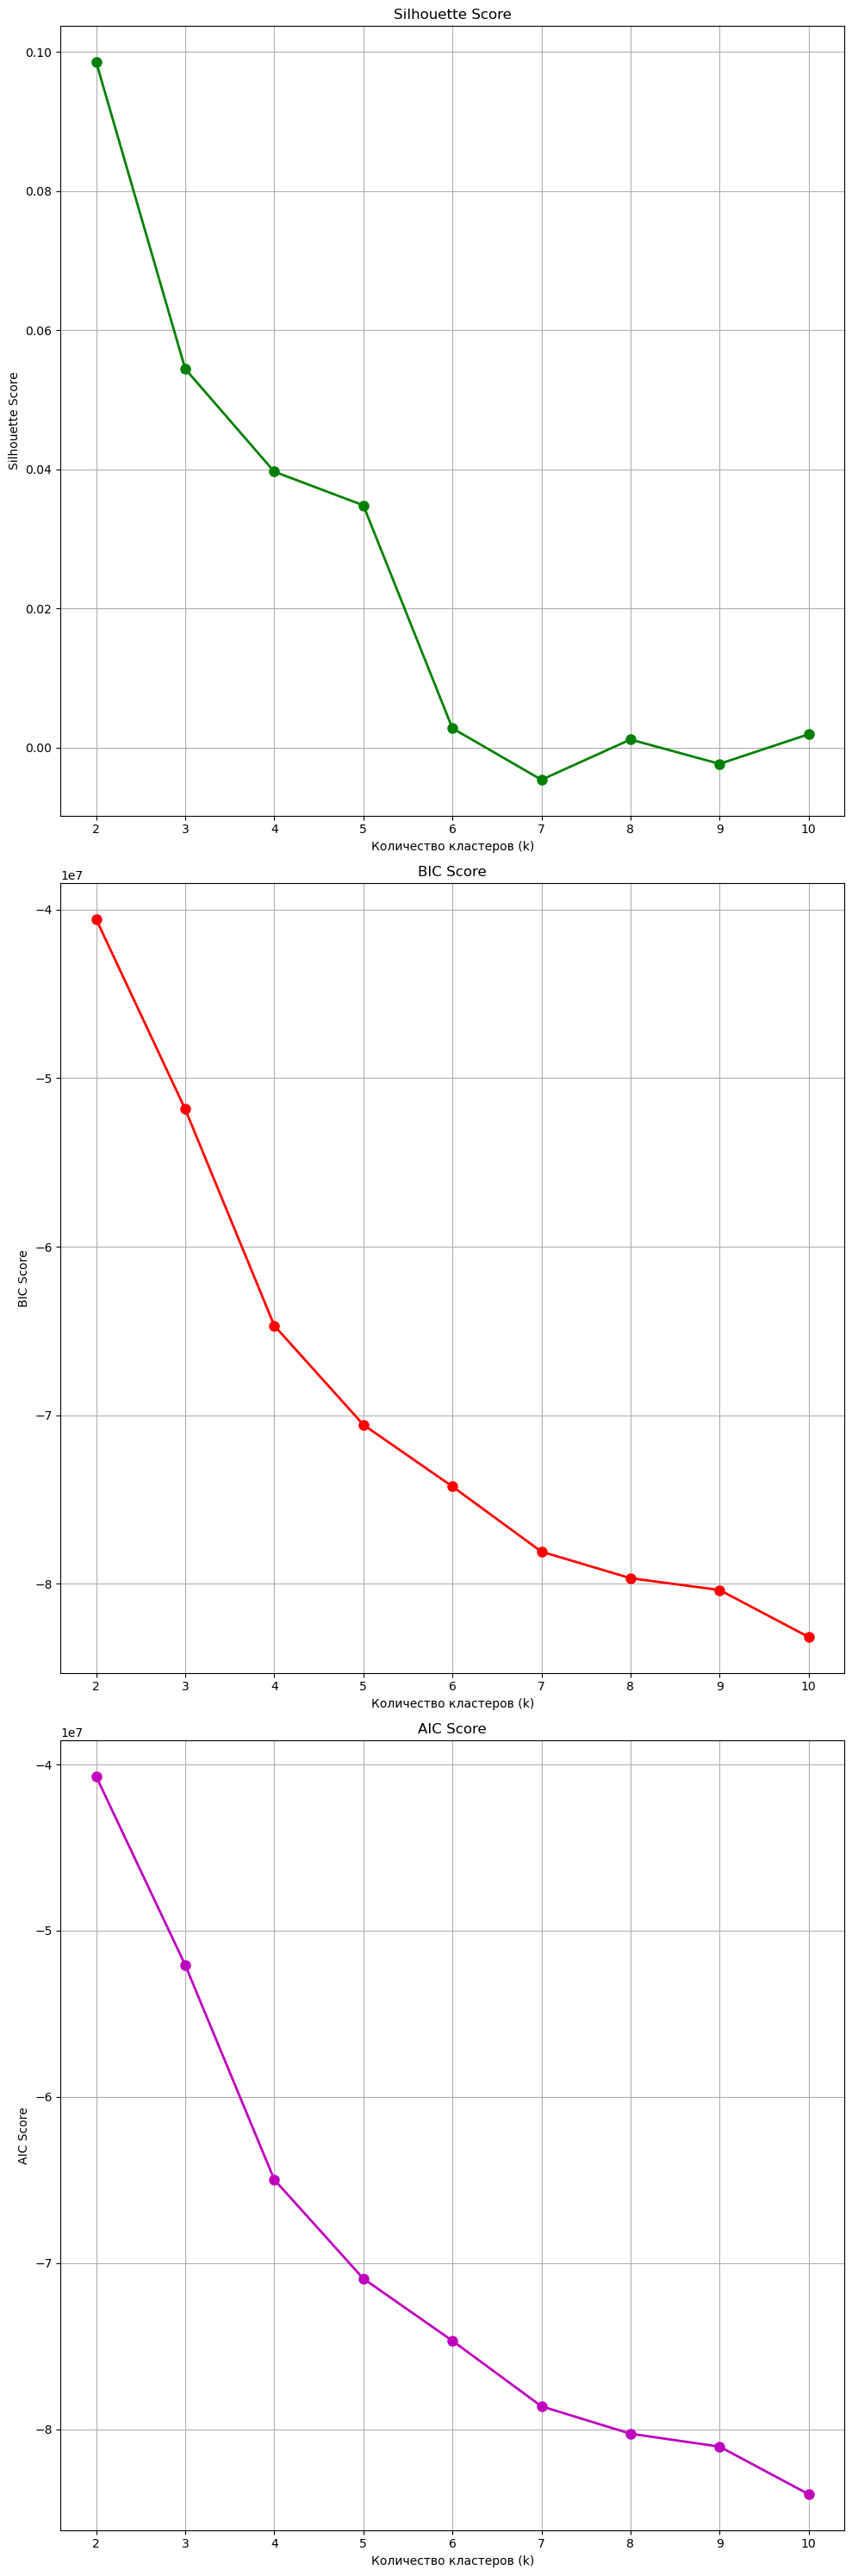

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, em_silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, bic_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('BIC Score')
axes[1].set_title('BIC Score')
axes[1].grid(True)

axes[2].plot(k_range, aic_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('AIC Score')
axes[2].set_title('AIC Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [41]:
optimal_k_em = 8

gmm = GaussianMixture(n_components=optimal_k_em, random_state=42)
em_labels = gmm.fit_predict(X_scaled)

df['em_cluster'] = em_labels

print(f"EM с k={optimal_k_em}")
print("Распределение по кластерам:")
print(df['em_cluster'].value_counts().sort_index())

EM с k=8
Распределение по кластерам:
em_cluster
0    26715
1    20924
2     2637
3     8181
4    10893
5     6389
6     1401
7    10054
Name: count, dtype: int64


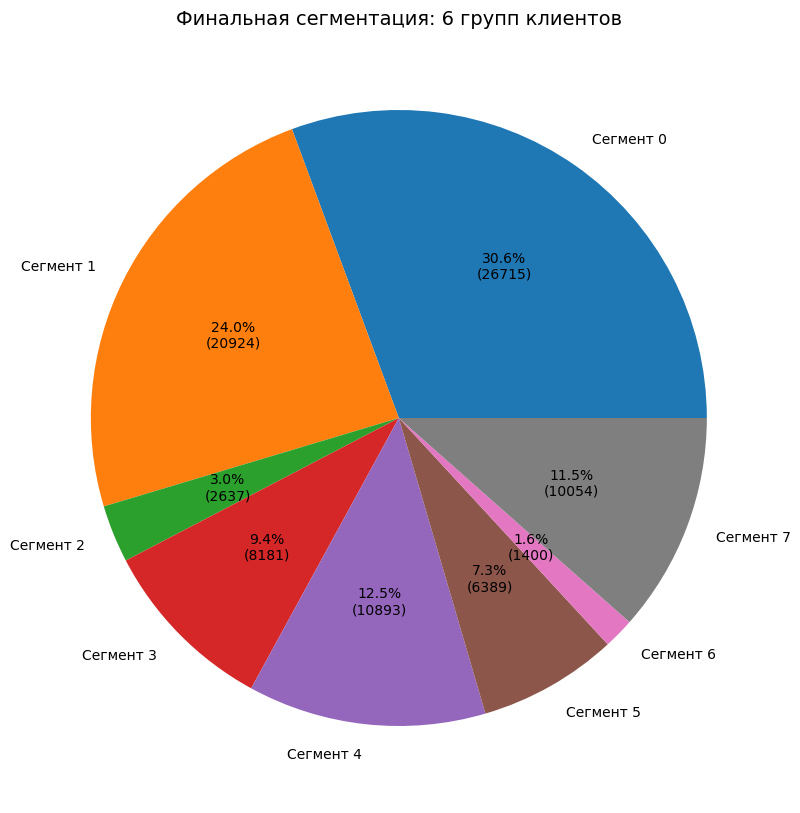

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 26715 | 30.64 |
| 1 | Сегмент 1 | 20924 | 24    |
| 2 | Сегмент 2 |  2637 |  3.02 |
| 3 | Сегмент 3 |  8181 |  9.38 |
| 4 | Сегмент 4 | 10893 | 12.49 |
| 5 | Сегмент 5 |  6389 |  7.33 |
| 6 | Сегмент 6 |  1401 |  1.61 |
| 7 | Сегмент 7 | 10054 | 11.53 |
+---+-----------+-------+-------+


In [42]:
from tabulate import tabulate

cluster_counts = df['em_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [43]:
cluster_profile = df.drop(['phone', 'kmeans_cluster'], axis=1, errors='ignore').groupby('em_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

em_cluster,0,1,2,3,4,5,6,7
ОбщаяСуммаЗаказов,4748.72,2536.99,9044.28,5515.54,6301.91,4059.02,7168.29,2844.52
ОбщаяМаржаЗаказов,1166.62,681.51,3832.59,1575.48,1560.50,1353.66,2013.24,646.45
КоличествоТоварныхПозиций,1.35,2.11,11.54,2.18,7.76,4.71,5.68,2.80
КоличествоЗаказов,1.40,1.32,2.83,1.45,2.42,2.02,2.44,1.58
ДоляОтменненыхЗаказов,0.05,0.04,0.06,0.05,0.07,0.06,0.06,0.05
ДоляДоставленныхЗаказов,0.92,0.93,0.92,0.93,0.91,0.90,0.92,0.92
ОбщееКоличествоТоваров,2.24,2.58,54.66,3.06,27.45,7.80,15.19,4.92
КоличествоУникальныхТоваров,1.48,2.36,20.91,2.64,12.45,6.70,10.05,3.42
ОбщаяСуммаУслуг,72.18,166.25,2216.34,182.46,891.91,491.88,709.94,240.60
СредняяСуммаУслуг,47.29,71.54,88.32,72.60,59.07,73.48,76.96,66.60


HDBSCAN пока странненько

In [54]:
from sklearn.cluster import HDBSCAN


hdbscan_model = HDBSCAN(
    min_cluster_size=1000,
    min_samples=20,
    metric='euclidean',
    n_jobs=-1              
)

labels = hdbscan_model.fit_predict(X_scaled)
df['hdbscan_cluster'] = labels

/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


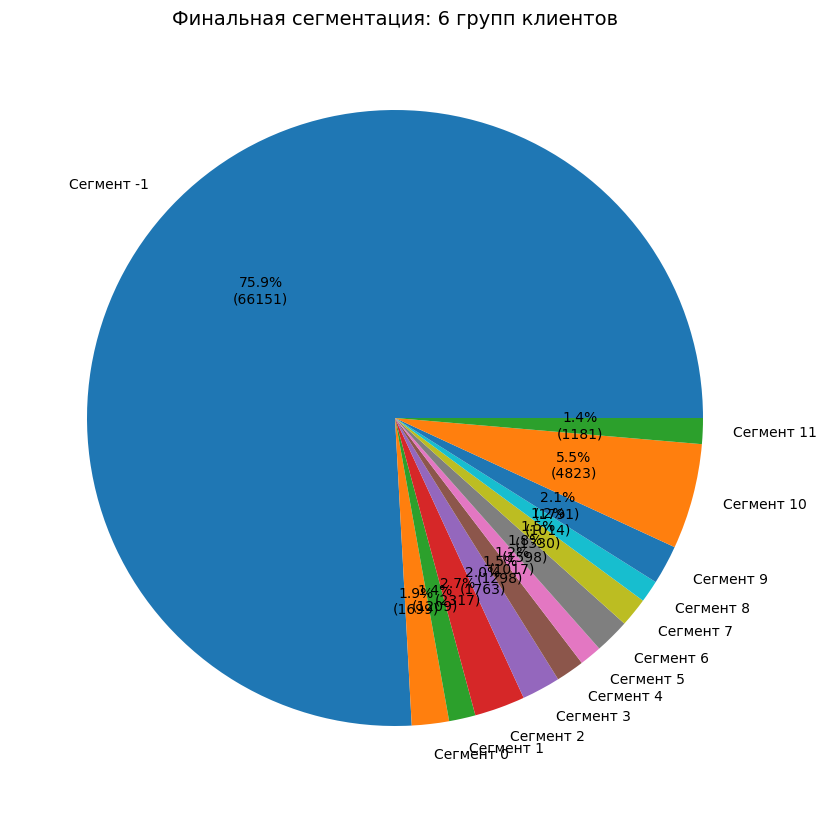

+----+------------+-------+-------+
|  0 | Сегмент -1 | 66151 | 75.87 |
|  1 | Сегмент 0  |  1699 |  1.95 |
|  2 | Сегмент 1  |  1210 |  1.39 |
|  3 | Сегмент 2  |  2317 |  2.66 |
|  4 | Сегмент 3  |  1764 |  2.02 |
|  5 | Сегмент 4  |  1298 |  1.49 |
|  6 | Сегмент 5  |  1017 |  1.17 |
|  7 | Сегмент 6  |  1598 |  1.83 |
|  8 | Сегмент 7  |  1330 |  1.53 |
|  9 | Сегмент 8  |  1015 |  1.16 |
| 10 | Сегмент 9  |  1791 |  2.05 |
| 11 | Сегмент 10 |  4823 |  5.53 |
| 12 | Сегмент 11 |  1181 |  1.35 |
+----+------------+-------+-------+


In [55]:
from tabulate import tabulate

cluster_counts = df['hdbscan_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


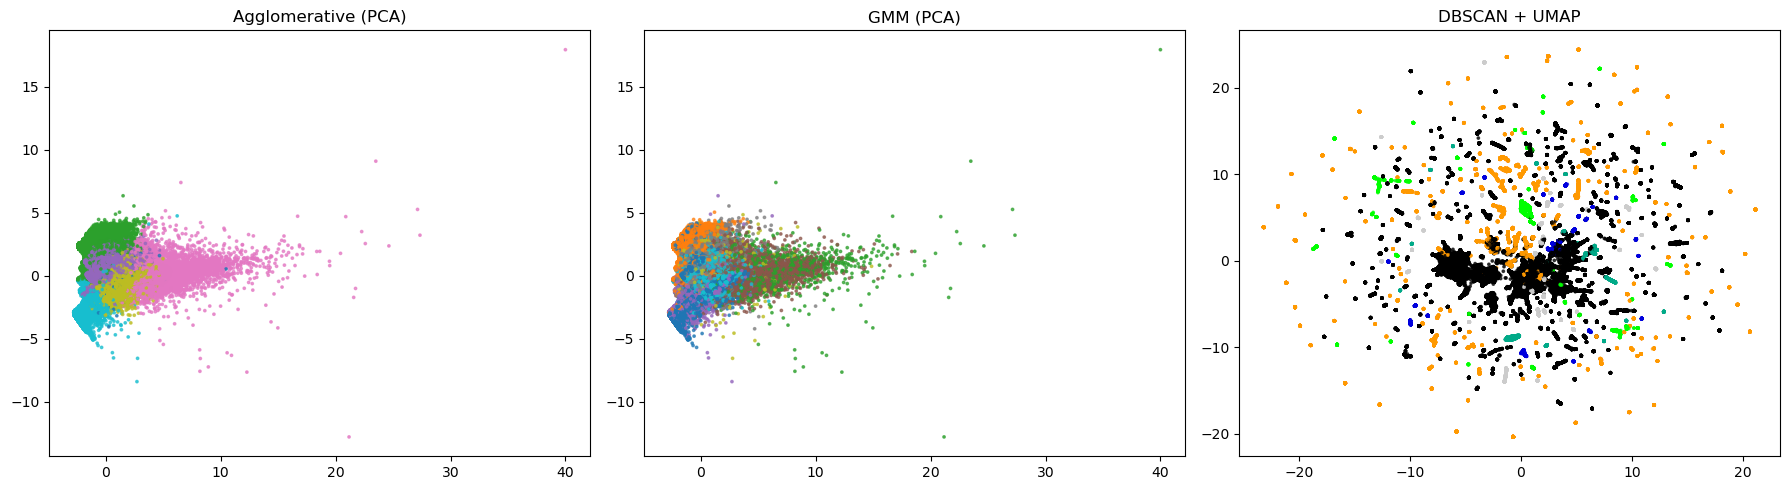

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap


X_pca = PCA(n_components=2).fit_transform(X_scaled)
X_umap = umap.UMAP(n_neighbors=50).fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=df['kmeans_cluster'])
axes[0].set_title('K-Means (PCA)')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=df['em_cluster'])
axes[1].set_title('GMM (PCA)')

axes[2].scatter(X_umap[:,0], X_umap[:,1], c=df['hdbscan_cluster'])
axes[2].set_title('HDBSCAN + UMAP')

plt.tight_layout()
plt.show()
